In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter 
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "ai_job_dataset.csv"
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "bismasajjad/global-ai-job-market-and-salary-trends-2025",
  file_path,
)
df_cleaned = df.dropna()

df_grouped = df_cleaned.groupby(['company_location', 'experience_level'])['job_title']
df_grouped = df_grouped.size()
df_grouped = df_grouped.reset_index(name='value')

df_sorted = df_grouped.sort_values(by=('company_location'), ascending=True)
df_sorted = df_sorted.reset_index(drop=True)

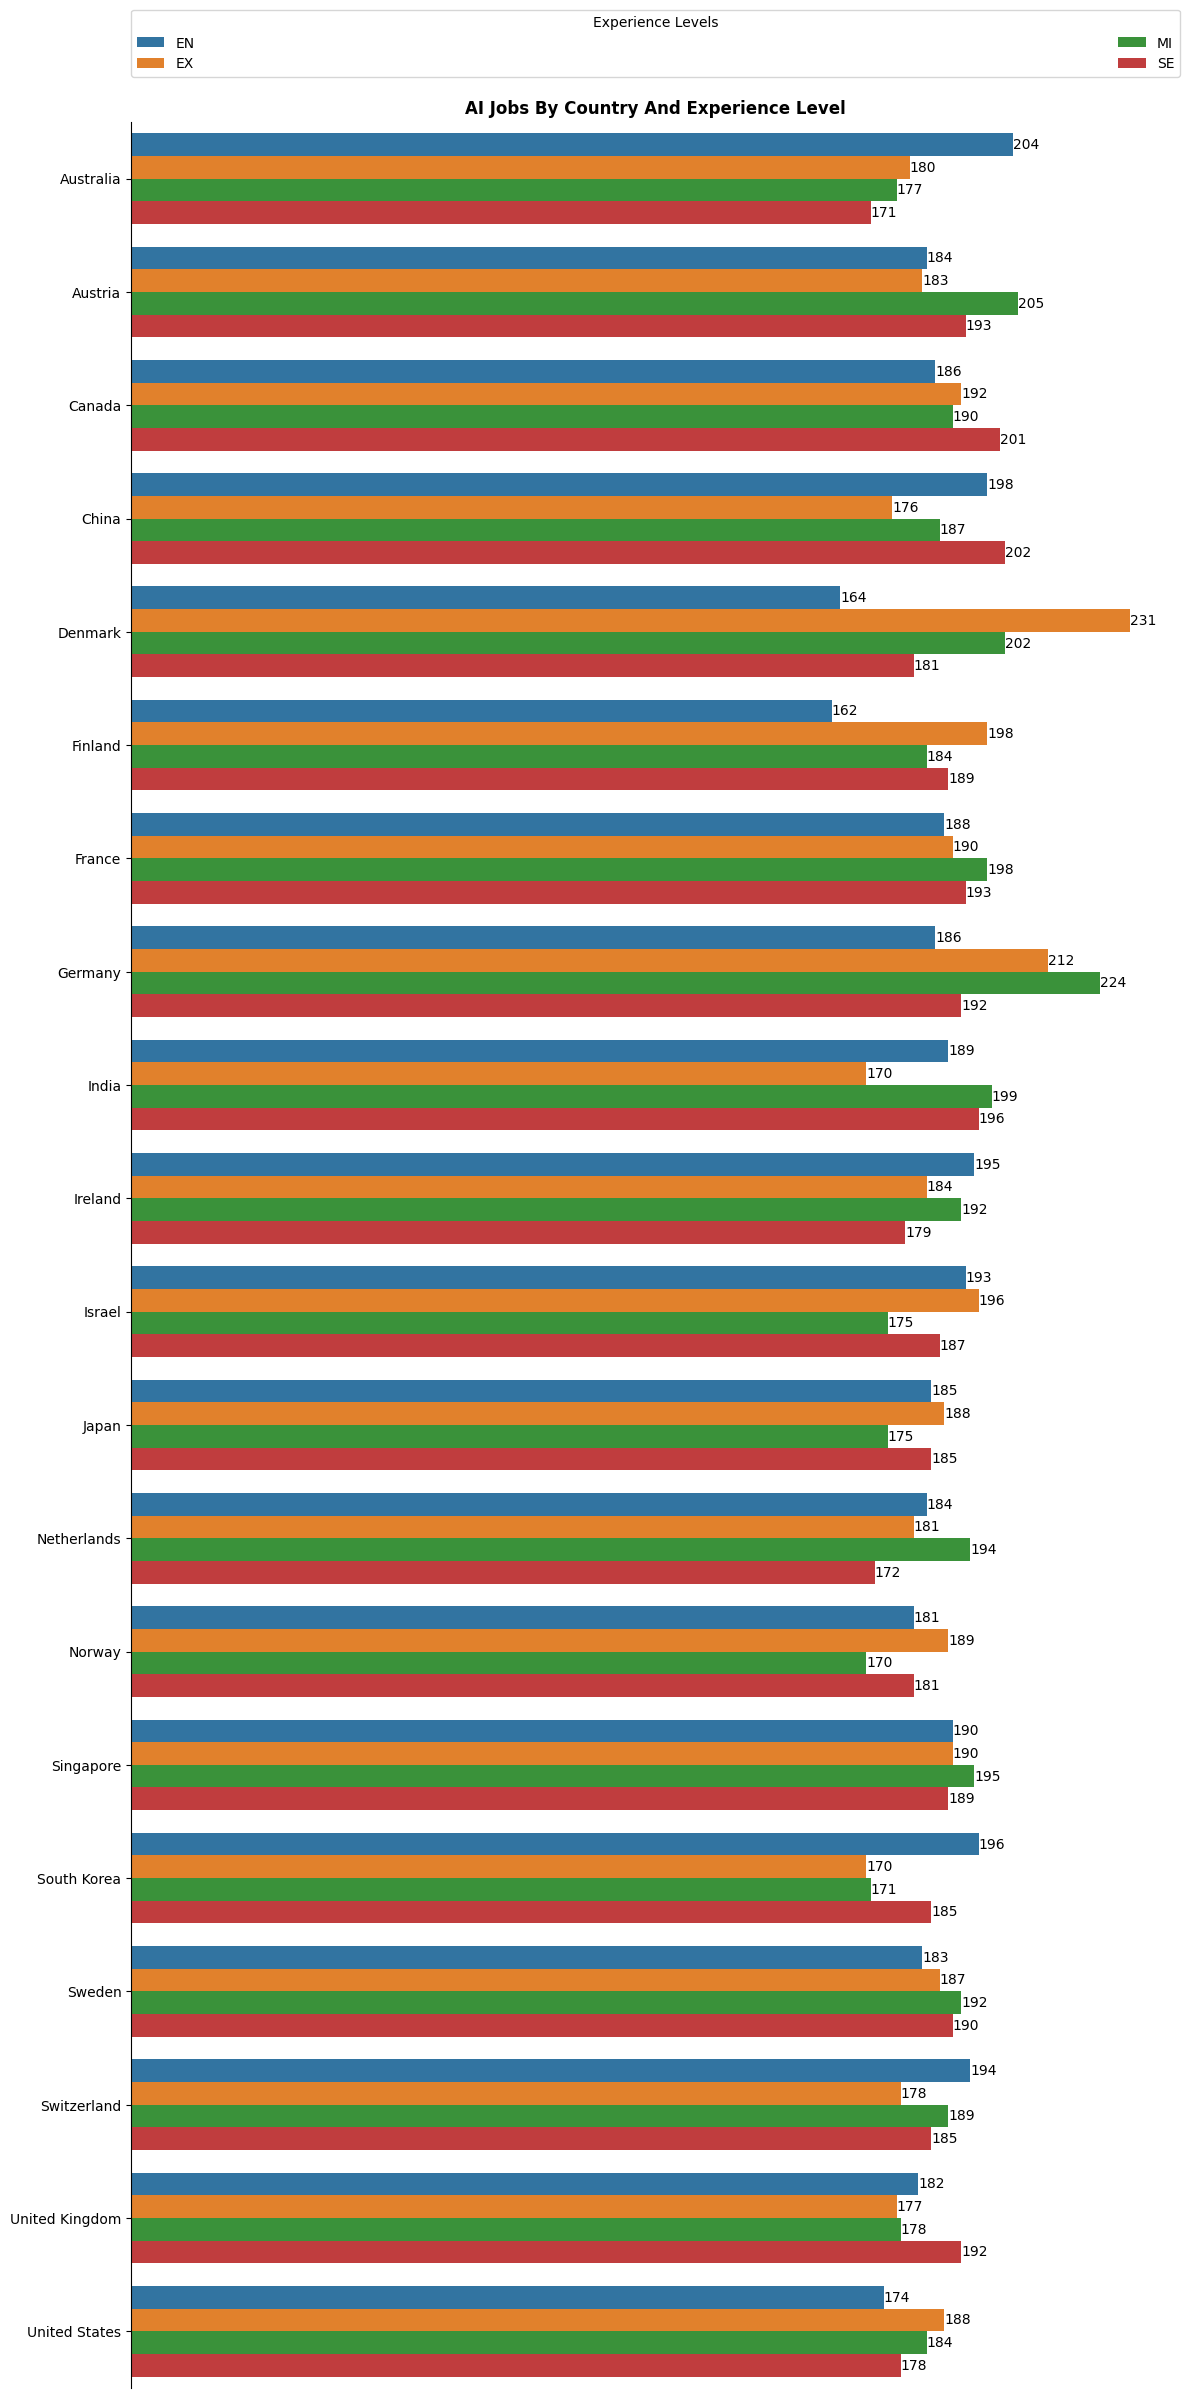

In [ ]:
fig, ax = plt.subplots(figsize=(12, 24))

sns.barplot(data=df_sorted, orient='h', ax=ax, x='value', y='company_location', hue='experience_level')

for container in ax.containers: 
    ax.bar_label(container, fmt="%.0f")

ax.set_title("AI Jobs By Country And Experience Level", fontweight="bold")
ax.set_ylabel("")
ax.xaxis.set_visible(False)
sns.despine(bottom=True)
ax.legend(title="Experience Levels", loc="lower left", bbox_to_anchor=(0, 1.02, 1, 0.2), mode="expand", borderaxespad=0, ncol=2)

plt.tight_layout()
plt.show()